In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df_Practisce = pd.read_csv('Data/Data_Practice4_ok.csv')
df_Practisce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      961 non-null    int64
 1   Shape    961 non-null    int64
 2   Margin   961 non-null    int64
 3   Density  961 non-null    int64
 4   Target   961 non-null    int64
dtypes: int64(5)
memory usage: 37.7 KB


In [3]:
df_Practisce.head()

Age  Shape  Margin  Density  Target
0    3      2       4        2       1
1    1      0       0        2       1
2    2      3       4        2       1
3    0      0       0        2       0
4    3      0       4        2       1

In [4]:
X = df_Practisce.drop('Target', axis=1)
X.head()

Age  Shape  Margin  Density
0    3      2       4        2
1    1      0       0        2
2    2      3       4        2
3    0      0       0        2
4    3      0       4        2

In [5]:
y = df_Practisce.Target
y.head()

0    1
1    1
2    1
3    0
4    1
Name: Target, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2)
print("Size of train dataset: ", X_train.shape)
print("Size of test dataset: ", X_test.shape)

Size of train dataset:  (768, 4)
Size of test dataset:  (193, 4)


In [7]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

[0.11246724 0.13762634 0.70067763 0.04922879]


<BarContainer object of 4 artists>

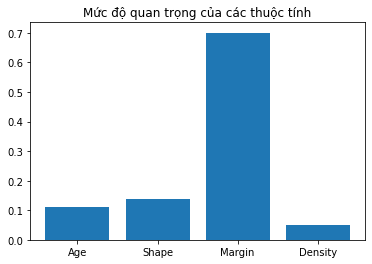

In [8]:
#Mức độ quan trọng của các thuộc tính trong tập huấn luyện
print(model.feature_importances_)

#Trực quan hóa
plt.title("Mức độ quan trọng của các thuộc tính")
plt.bar(X.columns, model.feature_importances_)

In [9]:
#Trực quan hóa cây quyết định tập huấn luyện:
from sklearn import tree
fig = plt.figure(figsize=(200,200))

tree.plot_tree(model, feature_names=X.columns,class_names=['0','1'], filled=True)

plt.show()

In [10]:
print("Độ chính xác tập huyến luyện: ", round(model.score(X_train, y_train)*100, 2))

y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc2 =  accuracy_score(y_test, y_pred, normalize=False)
print("Độ chính xác tập test: ", round(acc*100, 2))

print("Tổng số mẫu dự đoán đúng trên tập test là:", acc2, '/', len(y_test))
print("Tổng số mẫu dự đoán sai trên tập test là:", len(y_test)-acc2, '/', len(y_test))

Độ chính xác tập huyến luyện:  83.72
Độ chính xác tập test:  84.97
Tổng số mẫu dự đoán đúng trên tập test là: 164 / 193
Tổng số mẫu dự đoán sai trên tập test là: 29 / 193


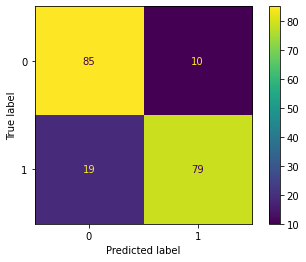

In [11]:
#Confusion matrix trên tập test
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)

Bệnh nhân với các thông số như sau:
- Age: 20 tuổi;
- Shape: Round;
- Margin: Circumscribed
- Density: Low

Thông số dữ liệu tương ứng Data_Practice4_ok:

| Age | Converted     |
| :-------- | :------- |
| Age<=30 | 0|
| 30<Age<=40 | 1 |
| 40<Age<=60 | 2 |
| 60<Age<=80 | 3 |
| Age>80 | 4 |

| Shape | Converted     |
| :-------- | :------- |
| Lobular | 1|
| Round | 3 |
| Oval | 2 |
| Irregular | 0 |

| Margin | Converted     |
| :-------- | :------- |
| Microlobulated | 1|
| Obscured | 2 |
| Spiculated | 3 |
| ill-defined | 4 |
| Circumscribed | 0 |

| Density | Converted     |
| :-------- | :------- |
| Fat-containing | 0|
| High | 1 |
| Iso | 2 |
| Low | 3 | 

In [12]:
pred=model.predict([[0, 3, 0, 3]])
if pred[0] == 0:
    print('Khối u lành tính')
else:
    print('Khối u ác tính')

Khối u lành tính
